<a href="https://colab.research.google.com/github/anil-chhetri/Analytics-vidhya-practise/blob/master/cifar10_dphi_bootcamp_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
from tensorflow.keras.datasets import cifar10
(xtrain, ytrain) , (xtest, ytest) = cifar10.load_data()

In [ ]:
np.unique(ytrain), np.unique(ytest)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [ ]:
import pandas as pd
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv")

In [ ]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,98,105,108,92,101,106,91,101,107,93,104,108,89,100,104,88,99,103,90,101,106,95,105,110,99,108,110,109,117,116,119,125,123,125,130,128,134,140,138,140,...,184,178,177,172,190,188,184,220,219,214,195,193,187,176,174,169,175,173,168,192,189,185,185,182,178,168,165,161,178,176,171,183,182,176,175,175,168,181,181,175
1,101,108,101,101,108,101,102,109,102,103,110,103,105,112,104,105,114,109,105,116,112,106,115,110,108,115,108,107,115,107,104,115,106,104,116,108,108,119,115,108,...,149,153,159,164,132,140,142,134,144,145,112,119,118,108,115,111,114,124,122,106,118,116,101,113,108,100,111,102,99,110,103,100,109,104,100,109,103,100,109,102
2,85,115,27,63,90,25,37,66,15,69,93,49,40,52,36,18,24,18,31,38,27,79,91,61,104,117,78,72,84,52,68,79,52,122,131,85,104,113,67,77,...,139,174,188,139,182,198,150,179,194,147,175,186,142,187,195,158,176,191,142,169,190,132,177,193,144,180,189,147,175,190,141,172,193,136,173,192,138,179,192,149
3,213,213,214,215,214,218,220,218,226,223,221,233,226,225,231,225,226,223,223,223,223,227,226,231,229,228,236,229,228,236,230,229,236,228,227,235,227,226,234,225,...,20,111,41,28,111,63,60,120,92,98,138,117,129,153,140,158,172,161,187,188,174,205,195,182,212,199,185,216,197,186,216,193,194,209,201,204,216,203,201,237
4,41,74,144,41,75,139,41,75,139,41,74,144,39,76,140,37,79,130,38,77,135,40,75,142,43,72,145,47,71,146,47,73,140,43,75,140,39,77,143,37,...,149,42,71,135,43,72,125,42,72,122,51,72,117,64,70,109,65,72,99,53,76,113,35,75,136,30,81,140,34,79,133,41,77,130,44,75,133,42,73,144


In [ ]:
from matplotlib import pyplot as plt

image shape:  (32, 32, 3)


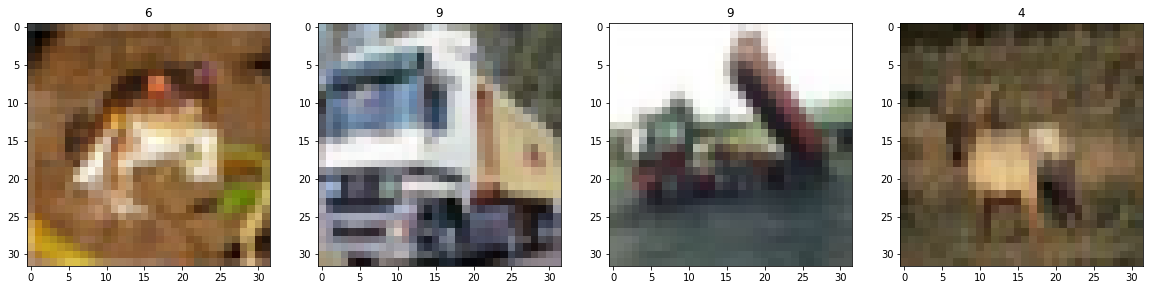

In [ ]:
image = xtrain[:4]
label = ytrain[:4]
fig = plt.figure(figsize=(20,10))

print('image shape: ', image[0].shape)

for index, data in enumerate(zip(image, label)):
  fig.add_subplot(1,4,index+1)
  plt.imshow(data[0])
  plt.title(data[1][0])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(patience=3, verbose=1)

In [ ]:
model = Sequential() 
model.add(Dense(60, activation='relu', input_shape=(3072, )))

model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))


model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.001), metrics=['accuracy'])

### Data preparation for Neural Network

In [ ]:
xtrain = xtrain.reshape(-1, 3072)
xtest = xtest.reshape(-1, 3072)
xval = test_data.iloc[:, :].values.reshape(-1, 3072)

In [ ]:
ytrain = to_categorical(ytrain, num_classes=10)
ytest = to_categorical(ytest, num_classes=10)

In [ ]:
history = model.fit(
    xtrain,
    ytrain,
    batch_size=32,
    epochs=20,
    verbose=1,
    validation_data = (xtest, ytest)
)

Epoch 1/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5341 - accuracy: 0.8053 - val_loss: 3.1720 - val_accuracy: 0.3977
Epoch 2/20
1563/1563 [==============================] - 13s 9ms/step - loss: 0.5167 - accuracy: 0.8121 - val_loss: 3.2469 - val_accuracy: 0.3921
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5043 - accuracy: 0.8156 - val_loss: 3.3159 - val_accuracy: 0.3893
Epoch 4/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5298 - accuracy: 0.8074 - val_loss: 3.2303 - val_accuracy: 0.4021
Epoch 5/20
1563/1563 [==============================] - 13s 9ms/step - loss: 0.4938 - accuracy: 0.8191 - val_loss: 3.3045 - val_accuracy: 0.4014
Epoch 6/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4732 - accuracy: 0.8271 - val_loss: 3.2992 - val_accuracy: 0.4007
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4936 - accuracy: 0.8210 - val_loss: 3.5675 - val_ac

In [ ]:
pred = model.predict(xval)
res = pd.DataFrame(np.argmax(pred, axis=1))
res.columns = ['prediction']
','.join(res.prediction.map(str).to_list())

Model 2

In [ ]:
model2 = Sequential()
model2.add(Dense(512, activation='relu', input_shape = (3072, )))


model2.add(Dense(1024, activation='relu'))
model2.add(Dense(1024, activation='relu'))
model2.add(Dense(1024, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(215, activation='relu'))


model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])

In [ ]:
es = EarlyStopping(patience=2)

In [ ]:
history = model2.fit(
    xtrain,
    ytrain,
    batch_size=32,
    epochs=20,
    verbose=1,
    validation_data = (xtest, ytest),
    callbacks = [es]
)

Epoch 1/20
1563/1563 [==============================] - 101s 64ms/step - loss: 1.9438 - accuracy: 0.2797 - val_loss: 1.8638 - val_accuracy: 0.3156
Epoch 2/20
1563/1563 [==============================] - 100s 64ms/step - loss: 1.9070 - accuracy: 0.2983 - val_loss: 1.8412 - val_accuracy: 0.3292
Epoch 3/20
1563/1563 [==============================] - 101s 65ms/step - loss: 1.8802 - accuracy: 0.3124 - val_loss: 1.8056 - val_accuracy: 0.3458
Epoch 4/20
1563/1563 [==============================] - 100s 64ms/step - loss: 1.8569 - accuracy: 0.3200 - val_loss: 1.7903 - val_accuracy: 0.3476
Epoch 5/20
1563/1563 [==============================] - 97s 62ms/step - loss: 1.8281 - accuracy: 0.3356 - val_loss: 1.7592 - val_accuracy: 0.3626
Epoch 6/20
1563/1563 [==============================] - 97s 62ms/step - loss: 1.8089 - accuracy: 0.3404 - val_loss: 1.7529 - val_accuracy: 0.3601
Epoch 7/20
1563/1563 [==============================] - 97s 62ms/step - loss: 1.7888 - accuracy: 0.3486 - val_loss: 1.73

In [ ]:
pred = model2.predict(xval)
res = pd.DataFrame(np.argmax(pred, axis=1))
res.columns = ['prediction']
','.join(res.prediction.map(str).to_list())

'7,5,4,1,3,1,3,7,6,5,8,9,5,1,3,4,0,2,2,6,3,9,2,9,2,8,8,2,5,7,7,5,7,2,2,0,6,4,8,7,0,2,5,1,4,5,2,2,4,2,1,8,7,5,8,9,1,4,1,0,3,1,7,6,1,1,8,8,5,1,6,6,9,9,5,0,4,3,4,3,2,5,8,9,9,2,6,2,9,4,6,5,8,0,1,0,0,8,4,2,8,7,2,2,7,7,6,9,5,0,9,0,0,0,1,4,7,3,9,2,1,1,1,0,6,3,4,8,1,8,7,3,2,0,5,7,1,0,8,6,7,9,3,4,4,9,3,8,1,0,9,2,6,8,4,5,6,6,2,0,2,4,1,4,6,9,8,1,8,1,0,9,8,2,1,2,8,2,1,7,2,5,2,5,0,5,4,9,2,6,6,2,0,4,6,4,4,6,8,1,1,6,6,6,1,8,1,4,2,2,4,8,1,5,4,8,6,2,7,5,6,2,2,3,5,3,1,0,2,4,6,4,2,1,9,8,8,8,0,9,9,6,4,2,2,4,5,6,6,1,9,9,8,1,6,5,5,8,2,2,6,8,1,9,0,6,0,9,7,4,5,8,0,1,5,6,8,6,9,0,2,5,6,0,1,0,2,6,8,2,7,2,8,8,8,3,9,3,9,5,2,2,6,1,0,1,0,9,5,9,6,3,7,8,8,5,2,5,8,9,2,8,1,9,4,1,8,1,6,8,2,4,8,7,9,1,3,2,6,4,2,8,1,4,3,5,4,5,8,2,0,6,1,0,0,2,1,0,9,8,0,6,3,1,1,7,2,3,9,2,8,4,1,2,0,2,5,9,2,5,3,9,2,0,3,6,2,1,6,2,2,7,6,2,8,6,2,6,2,7,9,5,5,8,9,9,8,1,3,6,1,2,0,2,9,3,6,3,7,9,0,8,0,3,9,8,6,8,6,3,3,2,1,2,0,9,9,7,7,1,2,9,8,9,7,7,9,9,9,5,9,1,1,5,2,8,9,4,1,0,1,2,3,2,4,6,8,8,8,8,2,7,4,1,6,9,8,1,5,2,5,6,6,1,3,9,5,5,1,9,4,4,2,5,3,4,0,6,0,6